<a href="https://colab.research.google.com/github/kwbentleyjr/data_analytics_2/blob/main/Python/Unit_4_ML_Logistic_Regression_Class_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [24]:
import pandas as pd
#import the pandas package and use pd and an alias for calling the method

In [25]:
#read the file and assign it as an object called train
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [26]:
train.head(5)
#print the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [27]:
import seaborn as sns
#import the seaborn package and use sns as an alias to call the method

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
#import the matplotlib package and use plt as an alias for the method matplotlib.pyplot

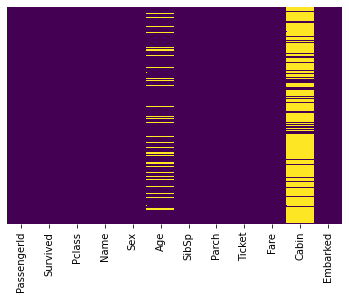

In [29]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#print a heat map of the null values in train without the y axis lables or the color map lable (cmap)

## Class


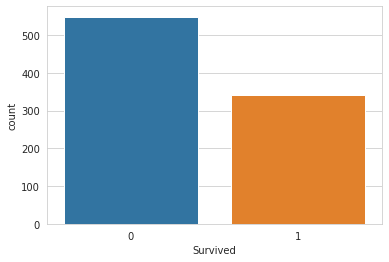

In [30]:
sns.set_style('whitegrid')#set the style of the graph to 'whitegrid'
sns.countplot(x='Survived', data=train)#make a bar graph of the number of survivors(1) and non-survivors(0)

## Survived

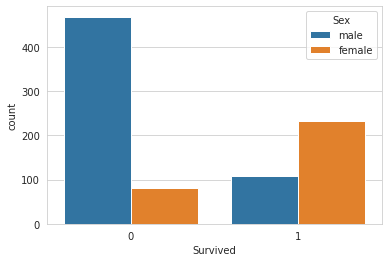

In [31]:
sns.set_style('whitegrid')#set the style of the graph to 'whitegrid'
sns.countplot(x='Survived', hue='Sex', data=train)#group the not-survived and survived columns by sex

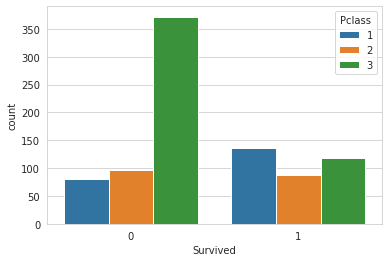

In [32]:
sns.set_style('whitegrid')#set the style of the graph to 'whitegrid'
sns.countplot(x='Survived', hue='Pclass', data=train)#group the not-survived and survived columns by passenger class (Pclass)

## Age

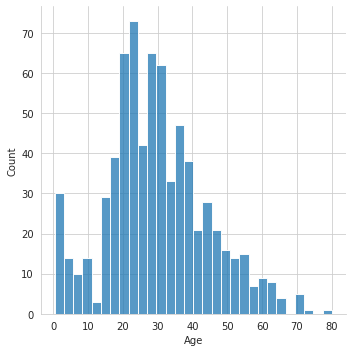

In [33]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)#make a histograph of the age distribution

## Siblings

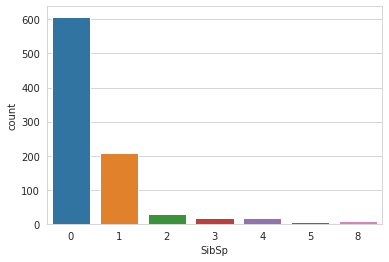

In [34]:
sns.countplot(x='SibSp',data=train)#make a graph of count of the passengers that have 0-8 siblings/spouses on board

EDA Observations:

There are a few missing age values but many missing Cabin values.

A higher percentage of females survived than males.

You were more likely to survie if you were in first class.  A high number of third class passengers did not survive.

Most of the passengers were between the ages of 20-35.

Most passengers were traveling without siblings or spouses.

# Data Cleaning and Data Pre - Processing

In [35]:
train.drop('Cabin', axis=1, inplace= True)#drop the cabin column

In [36]:
train.dropna(inplace=True)#drop all null values

In [37]:
sex = pd.get_dummies(train['Sex'], drop_first=True)#convert sex values to numerical
embark = pd.get_dummies(train['Embarked'], drop_first=True)#convert embarked values to numerical

In [38]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)#drop sex, emarked, name and ticket from the data frame

In [39]:
train.head()#display first 5 rows of train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
train = pd.concat([train, sex, embark],axis=1)#add sex and embark columns back to data frame called train

In [41]:
train.head()#display first 5 rows

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Observations:

To clean the data we dropped the 'cabin' column because of the high number of missing values.  

we also dropped all remaining null values and changed the Sex and Emabarked columns to numerical values.  Sex changed to 'male' and the values are 0 and 1 for False and True respectively.  The Embarked column changed to two columns (Q,S) that represented whether they did or did not emabark at Q(Queenstown) or S(Southhampton).  I would note that we should probably have not used the 'drop first=true' tag on Embarked because we ended up dropping the results for C(Cherbourg).

# Model building

In [42]:
#import train_test_split function from sklearn package
from sklearn.model_selection import train_test_split 

In [43]:
#randomly splits the dataset into two parts; 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101)

In [44]:
#import the linear regression function from sklearn package
from sklearn.linear_model import LogisticRegression 

In [45]:
#creates an instance of logisticRegression funtion and binds its references to the variable logmodel
logmodel = LogisticRegression() 

In [46]:
logmodel.fit(X_train, y_train) #takes X_train and y_train, then fits the model to define the classification model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predict = logmodel.predict(X_test) #creates the actual preditions and binds its references in the variable predict

Observations:

In this section we used logistic regression to predict if a passenger would survive or not survive.  We trained the model with 70% of the data and tested 30% of the data.

## Classification report

In [48]:
from sklearn.metrics import classification_report #import classification report from sklearn.metrics module

In [49]:
print(classification_report(y_test,predict)) #print classification report

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.72      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



Observations:

0 means not Survived.  Our model predicted that correctly that they did not survive 80% of the time (precision). 82% of the time, when the actual data said they did not survive, our model predicted they did not survive (recall).  

1 means survived.  Our model predicted correctly that they survived 72% of the time (precision).  70% of the time, when the actual data said they survived, our model predictd that they survived (recall).

## Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix #import confusion_matrix from sklearn.metrics module
print(confusion_matrix(y_test, predict)) #print confusion matrix

[[105  23]
 [ 26  60]]


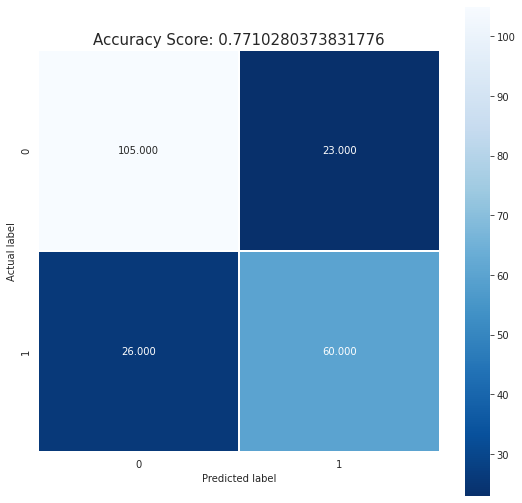

In [51]:
plt.figure(figsize=(9,9)) #size=9x9 inches
#create heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [52]:
from sklearn import  metrics #import metrics module from sklearn package

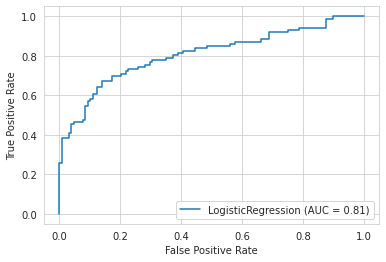

In [53]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  #plots the Receiver Operating Characteristic Curve

Observation..

0 means they did not survive. 1 means they did survive. The confusion matrix tells us that the model predicted correctly that 105 did not survive. It falsely predicted that 23 people survived when they did not survive.  The model predicted that 26 people did not survive when they did survive.  It also predicted correctly that 60 people survived.

This model was 77.103% accurate. The function calculated this by dividing the true positive and negative predictions and dividing by the total number of samples.


# Conclusion...

The data suggests that female passengers and first class passengers were more likely to survive.  Third class passengers were more likely to not survive.

Based on the ROC curve and the precision and recall, I would say that this model isn't the best at predicting survival rates.  I would want to increase the training sample to 80% and see if that improved the model's predictions.